# Demonstration
This is code to demonstrate how to work with the **Azure Synapse Studio** notebooks.
You can get more help at [Create, develop, and maintain Synapse notebooks in Azure Synapse Analytics](https://docs.microsoft.com/en-us/azure/synapse-analytics/spark/apache-spark-development-using-notebooks).

We will examine the following:

1. Markdown cells [Markdown for Jupyter notebooks cheatsheet](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)
1. Working with the file magic commands
1. Using the mssparkutil class
1. Access file as dataset
1. Display options
    1. Show column information
    1. Show sample data
    1. Display in charts
1. Using multiple languages
1. Using SQL

We won't go deep into how to actually develop.  My goal is to help you understand some of the mechanics of working with the notebooks.

In [1]:
print("Hello world!")

StatementMeta(Spark1, 6, 1, Finished, Available)

Hello world!


## File magic commands
The first thing I like to do is to get my bearings in the file system.
There are enough places that I am going to mess up.  I need to make sure that the file 
is where I think that it is.

These are some of the commands that **_might_** be available in Azure Synapse Studio.  https://ipython.readthedocs.io/en/stable/interactive/magics.html.

Try %lsmagic to get a full list of the commands.

### lsmagic
This provides a list of the magic commands with a link to the ipython document mentioned above.

In [3]:
%lsmagic  

StatementMeta(, 6, -1, Finished, Available)

Available line magics:
%lsmagic, %load, %fs, %history, %timeit, %time, %run, %help, %matplotlib, %pip, %conda, %kql

Available cell magics:
%%pyspark, %%spark, %%csharp, %%sql, %%html, %%writefile, %%time, %%timeit

### fs magic to get the filesystem information
This is where I start to learn about what is on the drive.

The only documentation that I have found for the %fs magic is the mssparkutils documentation for the fs class.  https://docs.microsoft.com/en-us/azure/synapse-analytics/spark/microsoft-spark-utilities?pivots=programming-language-python#file-system-utilities



In [4]:
%fs ls "abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/"


StatementMeta(Spark1, 6, 2, Finished, Available)

FileInfo(ACS2017_PUMS_README.pdf, abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/ACS2017_PUMS_README.pdf, 109514)
FileInfo(psam_pusa.csv, abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv, 1557409099)
FileInfo(psam_pusb.csv, abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusb.csv, 1474291038)



What is in a file?

`%fs head`

In [5]:
%fs head abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv  

StatementMeta(Spark1, 6, 3, Finished, Available)

The content exceeds 102400 bytes, so just display first 102400 bytes of the file.
RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTR,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPI,MLPJ,MLPK,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKW,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,PERNP,PINCP,POBP,POVPIP,POWPUMA,POWSP,PRIVCOV,PUBCOV,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,RC,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FAGEP,FANCP,FCITP,FCITWP,FCOWP,FDDRSP,FDEARP,FDEYEP,FDISP,FDOUTP,FDPHYP,FDRATP,FDRATXP,FDREMP,FENGP,FESRP,FFERP,FFODP,FGCLP,FGCMP,FGCRP,FHICOVP,FHINS1P,FHINS2P,FHINS3C,FHINS3P,FHINS4C,FHINS4P,FHINS5C,FHINS5P

In [6]:
%fs head abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv 1100

StatementMeta(Spark1, 6, 4, Finished, Available)

MagicUsageError: please provide file path
or quote the path if there are spaces, like "path to file"



## mssparkutil

mssparkutil is a utility class that you can use in several scenarios.  You can get directories of files or you can change the configuration of the your spark session.  If you are needing to do anything advanced with the Spark environment, I would see what is availabe in mssparkutil.

https://docs.microsoft.com/en-us/azure/synapse-analytics/spark/microsoft-spark-utilities?pivots=programming-language-python


Prepare by importing the library

In [46]:
from notebookutils import mssparkutils

StatementMeta(Spark1, 1, 45, Finished, Available)

In [47]:
folder = "abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/"
files = mssparkutils.fs.ls(folder)
for file in files:
    print(file.name, file.isDir, file.isFile, file.path, file.size)

StatementMeta(Spark1, 1, 46, Finished, Available)

ACS2017_PUMS_README.pdf False True abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/ACS2017_PUMS_README.pdf 109514
psam_pusa.csv False True abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv 1557409099
psam_pusb.csv False True abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusb.csv 1474291038


In [48]:
for file in [f for f in files if f.name.endswith(".csv")]:
    print(file.name, file.isDir, file.isFile, file.path, file.size)
    print(mssparkutils.fs.head(file.path, 2000))

StatementMeta(Spark1, 1, 47, Finished, Available)

psam_pusa.csv False True abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv 1557409099
RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTR,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPI,MLPJ,MLPK,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKW,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,PERNP,PINCP,POBP,POVPIP,POWPUMA,POWSP,PRIVCOV,PUBCOV,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,RC,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FAGEP,FANCP,FCITP,FCITWP,FCOWP,FDDRSP,FDEARP,FDEYEP,FDISP,FDOUTP,FDPHYP,FDRATP,FDRATXP,FDREMP,FENGP,FESRP,FFERP,FFODP,FGCLP,FGCMP,FGCRP,FHI

## Access file as dataset
Once I know where the file is, I want to query the file.  I can use different languages and tools to do that.  I am most comfortable using Python.

We won't delve deep into working with Python.

Where I start is on the data tab.  

In [7]:
df = spark.read.load('abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv', format='csv'
## If header exists uncomment line below
##, header=True
)
display(df.limit(10))

StatementMeta(Spark1, 6, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, b28f4d93-21cf-4f47-855c-66fc63de636d)

Let's add headers.

In [8]:
df = spark.read.load('abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv', format='csv'
## If header exists uncomment line below
, header=True
)
display(df.limit(100))

StatementMeta(Spark1, 6, 6, Finished, Available)

SynapseWidget(Synapse.DataFrame, e3a7999f-42bb-4ef6-ab0b-7fa14e80f827)

Let's view the schema information.

In [9]:
df.printSchema()

StatementMeta(Spark1, 6, 7, Finished, Available)

root
 |-- RT: string (nullable = true)
 |-- SERIALNO: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- SPORDER: string (nullable = true)
 |-- PUMA: string (nullable = true)
 |-- REGION: string (nullable = true)
 |-- ST: string (nullable = true)
 |-- ADJINC: string (nullable = true)
 |-- PWGTP: string (nullable = true)
 |-- AGEP: string (nullable = true)
 |-- CIT: string (nullable = true)
 |-- CITWP: string (nullable = true)
 |-- COW: string (nullable = true)
 |-- DDRS: string (nullable = true)
 |-- DEAR: string (nullable = true)
 |-- DEYE: string (nullable = true)
 |-- DOUT: string (nullable = true)
 |-- DPHY: string (nullable = true)
 |-- DRAT: string (nullable = true)
 |-- DRATX: string (nullable = true)
 |-- DREM: string (nullable = true)
 |-- ENG: string (nullable = true)
 |-- FER: string (nullable = true)
 |-- GCL: string (nullable = true)
 |-- GCM: string (nullable = true)
 |-- GCR: string (nullable = true)
 |-- HINS1: string (nullable = true)
 |-- HINS2: str

In [ ]:
df = spark.read.load('abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv', format='csv'
## If header exists uncomment line below
, header=True
)
df.printSchema()

StatementMeta(, , , Cancelled, )

The schema is entirely strings for all columns. 

Notice

Get a more detailed schema

In [10]:
df = spark.read.load('abfss://{StorageContainer}@{StorageAccount}.dfs.core.windows.net/census/PUMS/1-year/2017/Population/psam_pusa.csv', format='csv'
## If header exists uncomment line below
, header=True
, inferSchema=True
)
display(df.limit(100))

StatementMeta(Spark1, 6, 8, Finished, Available)

SynapseWidget(Synapse.DataFrame, c85b5c97-4451-45bc-8eef-b2f58760642e)

In [11]:
df.printSchema()

StatementMeta(Spark1, 6, 9, Finished, Available)

root
 |-- RT: string (nullable = true)
 |-- SERIALNO: long (nullable = true)
 |-- DIVISION: integer (nullable = true)
 |-- SPORDER: integer (nullable = true)
 |-- PUMA: integer (nullable = true)
 |-- REGION: integer (nullable = true)
 |-- ST: integer (nullable = true)
 |-- ADJINC: integer (nullable = true)
 |-- PWGTP: integer (nullable = true)
 |-- AGEP: integer (nullable = true)
 |-- CIT: integer (nullable = true)
 |-- CITWP: integer (nullable = true)
 |-- COW: integer (nullable = true)
 |-- DDRS: integer (nullable = true)
 |-- DEAR: integer (nullable = true)
 |-- DEYE: integer (nullable = true)
 |-- DOUT: integer (nullable = true)
 |-- DPHY: integer (nullable = true)
 |-- DRAT: integer (nullable = true)
 |-- DRATX: integer (nullable = true)
 |-- DREM: integer (nullable = true)
 |-- ENG: integer (nullable = true)
 |-- FER: integer (nullable = true)
 |-- GCL: integer (nullable = true)
 |-- GCM: integer (nullable = true)
 |-- GCR: integer (nullable = true)
 |-- HINS1: integer (nullable 

Now we are going restrict the number of columns to make it easier to work with the data

In [12]:
from pyspark.sql import functions as func

dfHisp = df.filter((df.AGEP < 65) & (df.HISP != 1 )).groupBy("HICOV").agg(func.sum("PWGTP").alias("TotalPopulation"))


StatementMeta(Spark1, 6, 10, Finished, Available)

In [59]:
display(dfHisp)

StatementMeta(Spark1, 1, 58, Finished, Available)

SynapseWidget(Synapse.DataFrame, 07f9b190-a99c-4cc2-a7d5-571111278dd0)

## Use a different language
You can open a dataframe using one language and manipulate it using a different language

First you need to create a temporary table 

In [13]:
dfHisp.createOrReplaceTempView("hispanicInsurance")

StatementMeta(Spark1, 6, 11, Finished, Available)

Run SQL

In [14]:
%%sql
SELECT * FROM hispanicInsurance

StatementMeta(Spark1, 6, 12, Finished, Available)

<Spark SQL result set with 2 rows and 2 fields>

Use C#

In [15]:
%%csharp

DataFrame df = spark.Sql("SELECT * FROM hispanicInsurance");

df.Show();

StatementMeta(Spark1, 6, 14, Finished, Available)

+-----+---------------+
|HICOV|TotalPopulation|
+-----+---------------+
|    1|       25434344|
|    2|        4936300|
+-----+---------------+



## Snippets
Type the word `Snippet` in a code cell and hit control-space. It will list some options for code snippets.

StatementMeta(Spark1, 6, 15, Finished, Available)

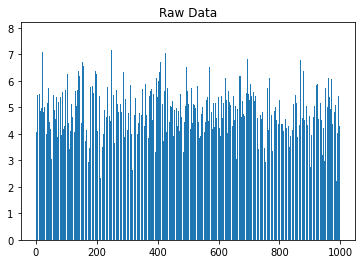

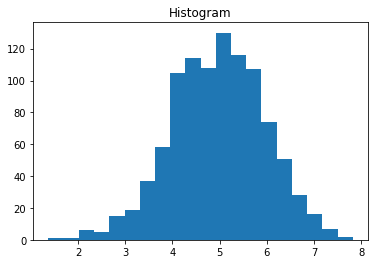

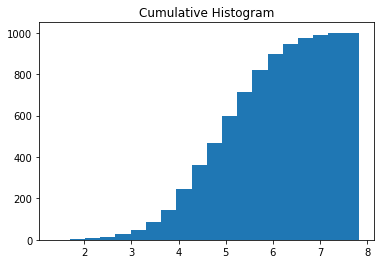

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
n = 5 + np.random.randn(1000)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

In [ ]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import * 

# Primary storage info 
account_name = 'Your primary storage account name' # fill in your primary account name 
container_name = 'Your container name' # fill in your container name 
relative_path = 'Your relative path' # fill in your relative folder path 

adls_path = 'abfss://%s@%s.dfs.core.windows.net/%s' % (container_name, account_name, relative_path) 
print('Primary storage account path: ' + adls_path) 

# Read a csv file 
csv_path = adls_path + 'Your file name ' 
df_csv = spark.read.csv(csv_path, header = 'true') 

# Read a parquet file 
parquet_path = adls_path + ' Your file name ' 
df_parquet = spark.read.parquet(parquet_path) 

# Read a json file 
json_path = adls_path + 'Your file name ' 
df_json = spark.read.json(json_path) 

StatementMeta(, , , Cancelled, )